In [1]:
import dill
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from dtw import dtw, dtw_ln, accelerated_dtw
from improved_dtw import dtw_improved
from fast_dtw import fastdtw
from fast_dtw import dtw as dtw_from_fast_dtw
from testing import TestFactory


distance = lambda x, y: np.linalg.norm(x - y, ord=2)

# Тестирование

## $Len = 30$ 

In [2]:
params = {
    "nrow": 100000,
    "window_size": 10,
    "element_length": 30,
    "path": "../data/Eye-Motion/ECoG.csv",
    "overlap": 0,
    "shuffle": True,
    "sample_size": 30,
    "chanel_num": 32,
    "repeat_num": 1
}

test_params = {
    "common_dtw_l=0.3_dist2": [[dtw_ln, distance, "common_dtw_l=0.3_dist2"], {"dump_result": False, "dtw_args": {"l":0.3}}],
}

tests = TestFactory(random_state=42, params=params)
X = tests.set_sample(1000)

In [3]:
result_infos_1 = {}
for key in test_params:
    result_infos_1[key] = tests.test_dtw(*test_params[key][0], **test_params[key][1])
    
with open("../data/result_info_30", 'wb') as f:
    dill.dump(result_infos_1, f)

Elapsed time: 1705.699


## $Len = 50$

In [4]:
params = {
    "nrow": 100000,
    "window_size": 10,
    "element_length": 50,
    "path": "../data/Eye-Motion/ECoG.csv",
    "overlap": 0,
    "shuffle": True,
    "sample_size": 30,
    "chanel_num": 32,
    "repeat_num": 1
}

test_params = {
    "common_dtw_l=0.2_dist2": [[dtw_ln, distance, "common_dtw_l=0.3_dist2"], {"dump_result": False, "dtw_args": {"l":0.2}}],
}

tests = TestFactory(random_state=42, params=params)
X = tests.set_sample(1000)

In [4]:
result_infos_2 = {}
for key in test_params:
    result_infos_2[key] = tests.test_dtw(*test_params[key][0], **test_params[key][1])
    
with open("../data/result_info_50", 'wb') as f:
    dill.dump(result_infos_2, f)

Elapsed time: 1605.790


In [2]:
with open("../data/result_info_50", 'rb') as f:
    res = dill.load(f)

In [3]:
info = res['common_dtw_l=0.3_dist2']

In [4]:
info.cluster(10)

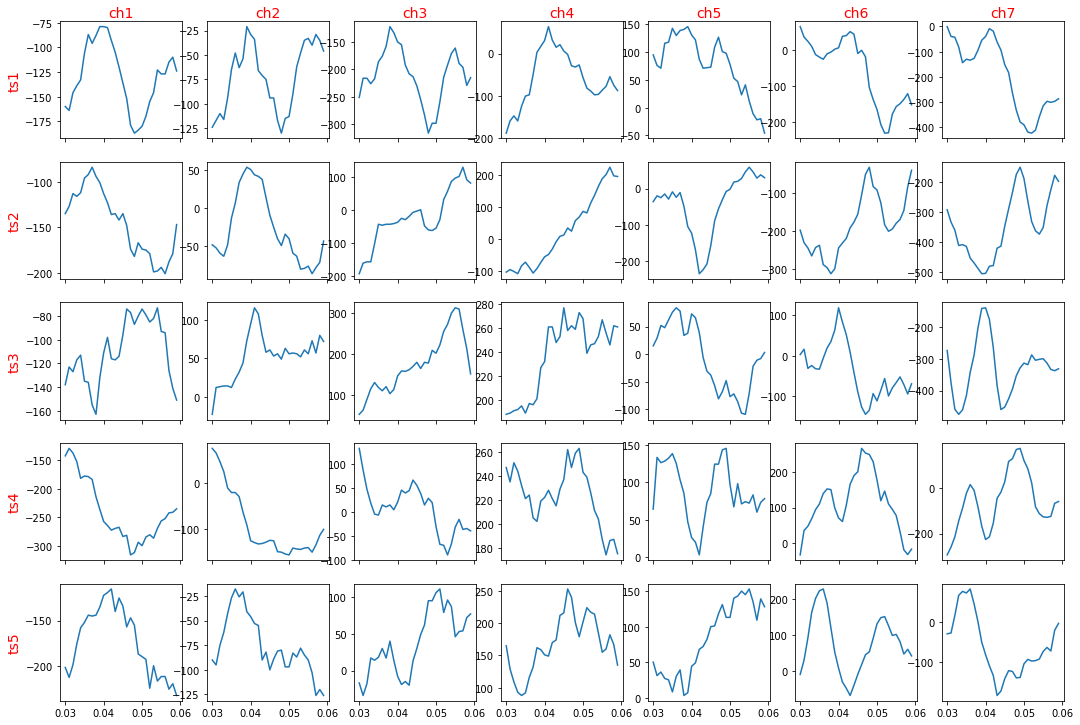

In [8]:
info.clusters_compare_table(3, )

## $Len = 100$

In [6]:
params = {
    "nrow": 1000000,
    "window_size": 10,
    "element_length": 100,
    "path": "../data/Eye-Motion/ECoG.csv",
    "overlap": 0,
    "shuffle": True,
    "sample_size": 30,
    "chanel_num": 32,
    "repeat_num": 1
}

test_params = {
    "common_dtw_l=0.1_dist2": [[dtw_ln, distance, "common_dtw_l=0.1_dist2"], {"dump_result": False, "dtw_args": {"l":0.1}}],
}

tests = TestFactory(random_state=42, params=params)
X = tests.set_sample(1000)

In [7]:

result_infos_3 = {}
for key in test_params:
    result_infos_3[key] = tests.test_dtw(*test_params[key][0], **test_params[key][1])
    
with open("../data/result_info_100", 'wb') as f:
    dill.dump(result_infos_3, f)

KeyboardInterrupt: 